# Exploratory Data Analysis (EDA) - Dataset Nhà Xe

## Giới Thiệu Vấn Đề

Notebook này thực hiện phân tích khám phá (EDA) trên dataset về thông tin nhà xe, giá vé, đánh giá và các đặc tính khác. Mục đích là hiểu rõ cấu trúc dữ liệu, phát hiện vấn đề và tạo các feature mới cho mô hình machine learning.

## 1. Import Thư Viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 2. Đọc Dữ Liệu

In [2]:
# Đọc file CSV
df = pd.read_csv('all_data.csv')
print("Dữ liệu đã được tải thành công!")
print(f"Kích thước dataset: {df.shape[0]} hàng × {df.shape[1]} cột")

Dữ liệu đã được tải thành công!
Kích thước dataset: 23206 hàng × 21 cột


## 3. Thông Tin Tổng Quan Về Dữ Liệu

In [3]:
# Hiển thị 5 hàng đầu
print("5 hàng đầu của dataset:")
print(df.head())
print("\n" + "="*80 + "\n")

# Kiểu dữ liệu
print("Kiểu dữ liệu của các cột:")
print(df.dtypes)
print("\n" + "="*80 + "\n")

# Thông tin chi tiết
print("Thông tin chi tiết:")
df.info()

5 hàng đầu của dataset:
     company_name departure_time pickup_point arrival_time dropoff_point  \
0      Hoàng Thuỷ       18:45:00       Bến xe        05:45        Bến xe   
1  Sinh Diên Hồng       17:30:00       Bến xe        04:15        Bến xe   
2       Phong Phú       20:00:00    Văn phòng        07:45     Văn phòng   
3  Kính Diên Hồng       18:40:00       Bến xe        05:40        Bến xe   
4         Đức Đạt       20:10:00       Bến xe        06:35        Bến xe   

   price_original  price_discounted departure_date start_point destination  \
0          350000            300000     2025-11-12     Sài Gòn     Gia Lai   
1          370000            296000     2025-11-12     Sài Gòn     Gia Lai   
2          530000            399000     2025-11-12     Sài Gòn     Gia Lai   
3          350000                 0     2025-11-12     Sài Gòn     Gia Lai   
4          350000            300000     2025-11-12     Sài Gòn     Gia Lai   

   rating_safety  rating_info_accuracy  rating_inf

## 4. Kiểm Tra Missing Values

In [4]:
# Kiểm tra giá trị thiếu
missing_data = pd.DataFrame({
    'Cột': df.columns,
    'Missing': df.isnull().sum(),
    'Tỷ Lệ (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

print("Thống kê Missing Values:")
print(missing_data[missing_data['Missing'] > 0])

if missing_data['Missing'].sum() == 0:
    print("\n✓ Dataset không có giá trị thiếu (Missing Values)")
else:
    print(f"\n⚠ Tổng cộng {missing_data['Missing'].sum()} giá trị thiếu cần xử lý")

Thống kê Missing Values:
Empty DataFrame
Columns: [Cột, Missing, Tỷ Lệ (%)]
Index: []

✓ Dataset không có giá trị thiếu (Missing Values)


## 5. Thống Kê Mô Tả

In [5]:
# Thống kê cho các biến số
print("Thống kê mô tả các biến Numeric:")
print(df.describe().round(2))
print("\n" + "="*80 + "\n")

# Thống kê cho các biến phân loại
print("Thống kê các biến Categorical:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} giá trị duy nhất")
    print(df[col].value_counts())

Thống kê mô tả các biến Numeric:
       price_original  price_discounted  rating_safety  rating_info_accuracy  \
count        23206.00          23206.00       23206.00              23206.00   
mean        333291.22         132604.72           4.58                  4.45   
std         158613.76         172687.45           0.36                  0.47   
min              0.00              0.00           2.30                  1.00   
25%         220000.00              0.00           4.50                  4.20   
50%         300000.00              0.00           4.70                  4.60   
75%         410000.00         270000.00           4.80                  4.80   
max        1200000.00         900000.00           5.00                  5.00   

       rating_info_completeness  rating_staff_attitude  rating_comfort  \
count                  23206.00               23206.00        23206.00   
mean                       4.51                   4.49            4.44   
std                     

## 6. Phát Hiện và Xử Lý Vấn Đề Dữ Liệu

In [6]:
# Kiểm tra giá trị 0 hoặc âm trong các cột quan trọng
print("Kiểm tra các giá trị bất thường:")
print(f"\nGiá trị 0 trong cột 'price_original': {(df['price_original'] == 0).sum()}")
print(f"Giá trị 0 trong cột 'price_discounted': {(df['price_discounted'] == 0).sum()}")
print(f"Giá trị âm trong cột 'price_original': {(df['price_original'] < 0).sum()}")
print(f"Giá trị âm trong cột 'price_discounted': {(df['price_discounted'] < 0).sum()}")

# Kiểm tra duplicate rows
print(f"\nSố dòng duplicate: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Loại bỏ các dòng duplicate...")
    df = df.drop_duplicates()
    print(f"Dataset sau khi loại bỏ duplicates: {df.shape[0]} hàng")

Kiểm tra các giá trị bất thường:

Giá trị 0 trong cột 'price_original': 287
Giá trị 0 trong cột 'price_discounted': 12824
Giá trị âm trong cột 'price_original': 0
Giá trị âm trong cột 'price_discounted': 0

Số dòng duplicate: 0


## 7. Phân Phối Các Biến Quan Trọng

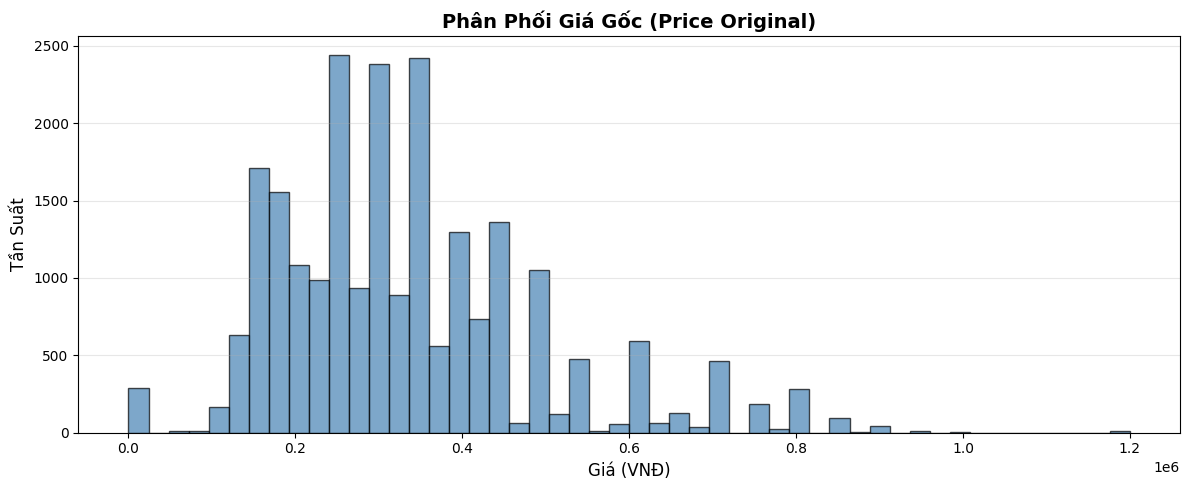


📊 Nhận xét:
- Giá gốc trung bình: 333,291 VNĐ
- Giá gốc cao nhất: 1,200,000 VNĐ
- Giá gốc thấp nhất: 0 VNĐ
- Độ lệch chuẩn: 158,614 VNĐ


In [7]:
# Biểu đồ 1: Phân phối giá gốc
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df['price_original'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_title('Phân Phối Giá Gốc (Price Original)', fontsize=14, fontweight='bold')
ax.set_xlabel('Giá (VNĐ)', fontsize=12)
ax.set_ylabel('Tần Suất', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Nhận xét:")
print(f"- Giá gốc trung bình: {df['price_original'].mean():,.0f} VNĐ")
print(f"- Giá gốc cao nhất: {df['price_original'].max():,.0f} VNĐ")
print(f"- Giá gốc thấp nhất: {df['price_original'].min():,.0f} VNĐ")
print(f"- Độ lệch chuẩn: {df['price_original'].std():,.0f} VNĐ")

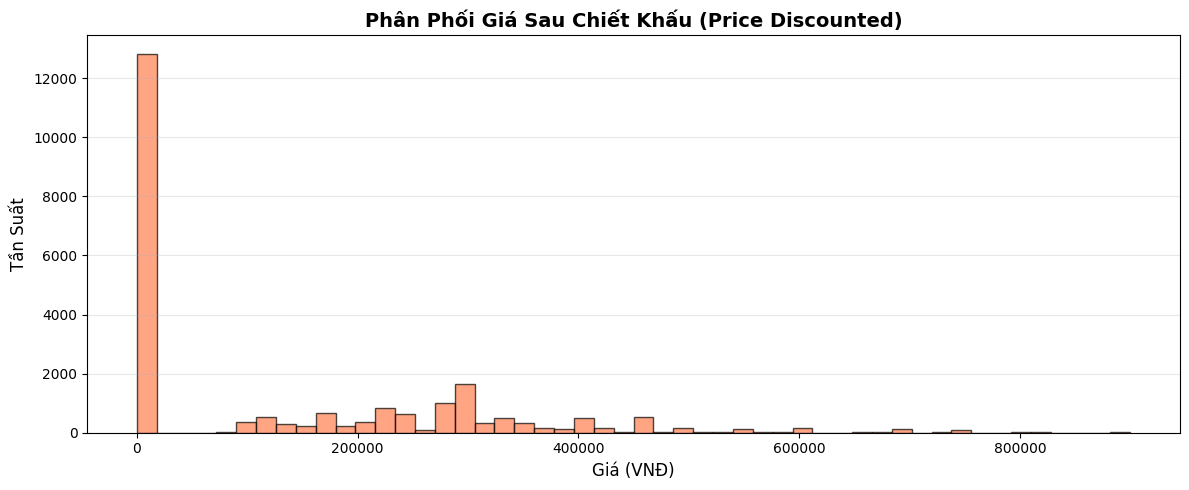


📊 Nhận xét:
- Giá sau chiết khấu trung bình: 132,605 VNĐ
- Tỷ lệ giá trị 0: 55.26%
- Cần xử lý giá trị 0 bằng cách thay thế bằng price_original


In [8]:
# Biểu đồ 2: Phân phối giá sau chiết khấu
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df['price_discounted'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax.set_title('Phân Phối Giá Sau Chiết Khấu (Price Discounted)', fontsize=14, fontweight='bold')
ax.set_xlabel('Giá (VNĐ)', fontsize=12)
ax.set_ylabel('Tần Suất', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Nhận xét:")
print(f"- Giá sau chiết khấu trung bình: {df['price_discounted'].mean():,.0f} VNĐ")
print(f"- Tỷ lệ giá trị 0: {(df['price_discounted'] == 0).sum() / len(df) * 100:.2f}%")
print(f"- Cần xử lý giá trị 0 bằng cách thay thế bằng price_original")

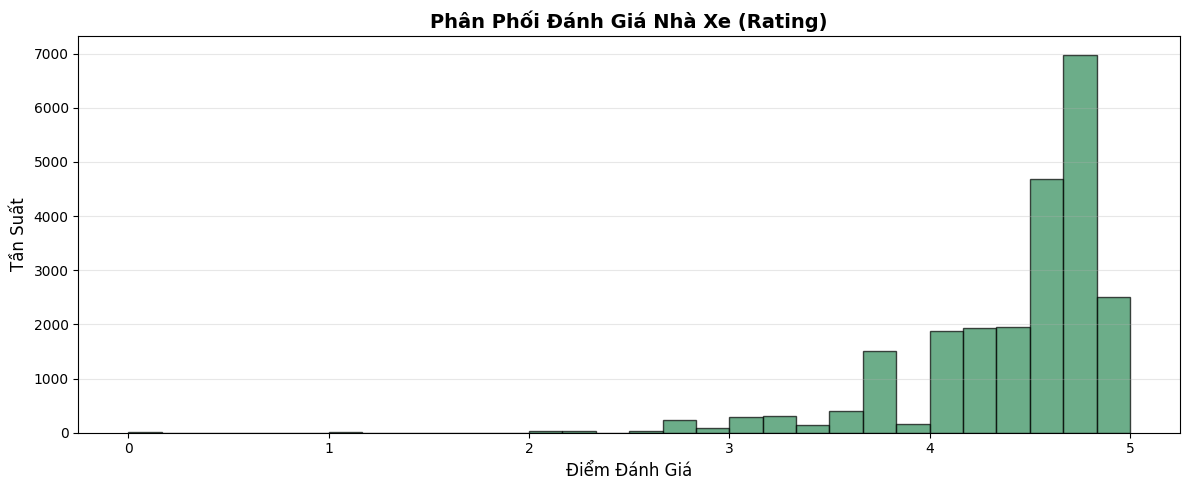


📊 Nhận xét:
- Đánh giá trung bình: 4.43/5
- Đánh giá cao nhất: 5.00
- Đánh giá thấp nhất: 0.00
- Phân phối có xu hướng lệch về bên phải (positively skewed)


In [9]:
# Biểu đồ 3: Phân phối đánh giá
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df['rating_overall'], bins=30, color='seagreen', edgecolor='black', alpha=0.7)
ax.set_title('Phân Phối Đánh Giá Nhà Xe (Rating)', fontsize=14, fontweight='bold')
ax.set_xlabel('Điểm Đánh Giá', fontsize=12)
ax.set_ylabel('Tần Suất', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Nhận xét:")
print(f"- Đánh giá trung bình: {df['rating_overall'].mean():.2f}/5")
print(f"- Đánh giá cao nhất: {df['rating_overall'].max():.2f}")
print(f"- Đánh giá thấp nhất: {df['rating_overall'].min():.2f}")
print(f"- Phân phối có xu hướng lệch về bên phải (positively skewed)")

In [10]:
df.head()

,company_name,departure_time,pickup_point,arrival_time,dropoff_point,price_original,price_discounted,departure_date,start_point,destination,rating_safety,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes
0,Hoàng Thuỷ,18:45:00,Bến xe,05:45,Bến xe,350000,300000,2025-11-12,Sài Gòn,Gia Lai,4.8,4.7,4.7,4.7,4.6,4.6,4.9,4.7,3485,34,660
1,Sinh Diên Hồng,17:30:00,Bến xe,04:15,Bến xe,370000,296000,2025-11-12,Sài Gòn,Gia Lai,4.7,4.7,4.8,4.8,4.6,4.6,4.9,4.6,237,34,645
2,Phong Phú,20:00:00,Văn phòng,07:45,Văn phòng,530000,399000,2025-11-12,Sài Gòn,Gia Lai,4.5,4.5,4.6,4.5,4.4,4.4,4.7,4.5,8677,24,705
3,Kính Diên Hồng,18:40:00,Bến xe,05:40,Bến xe,350000,0,2025-11-12,Sài Gòn,Gia Lai,4.7,4.6,4.7,4.6,4.5,4.5,4.5,4.6,1135,34,660
4,Đức Đạt,20:10:00,Bến xe,06:35,Bến xe,350000,300000,2025-11-12,Sài Gòn,Gia Lai,4.6,4.5,4.6,4.5,4.5,4.5,4.9,4.7,1027,34,625


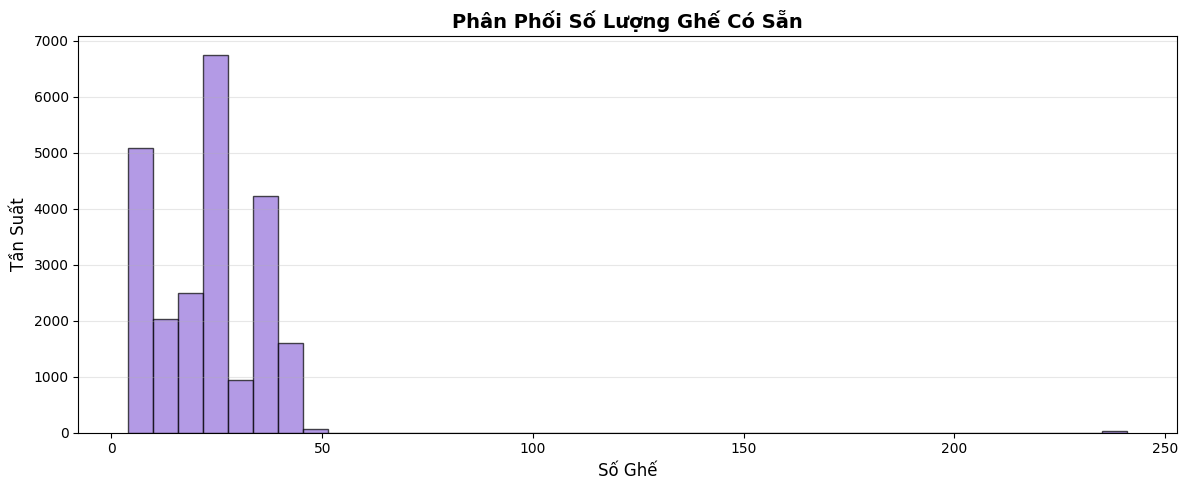


📊 Nhận xét:
- Trung bình ghế có sẵn: 22
- Số ghế tối đa: 241
- Số ghế tối thiểu: 4


In [11]:
# Biểu đồ 4: Phân phối số lượng ghế có sẵn
fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(df['number_of_seat'], bins=40, color='mediumpurple', edgecolor='black', alpha=0.7)
ax.set_title('Phân Phối Số Lượng Ghế Có Sẵn', fontsize=14, fontweight='bold')
ax.set_xlabel('Số Ghế', fontsize=12)
ax.set_ylabel('Tần Suất', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Nhận xét:")
print(f"- Trung bình ghế có sẵn: {df['number_of_seat'].mean():.0f}")
print(f"- Số ghế tối đa: {df['number_of_seat'].max()}")
print(f"- Số ghế tối thiểu: {df['number_of_seat'].min()}")

## 8. Phát Hiện Outliers với Boxplot

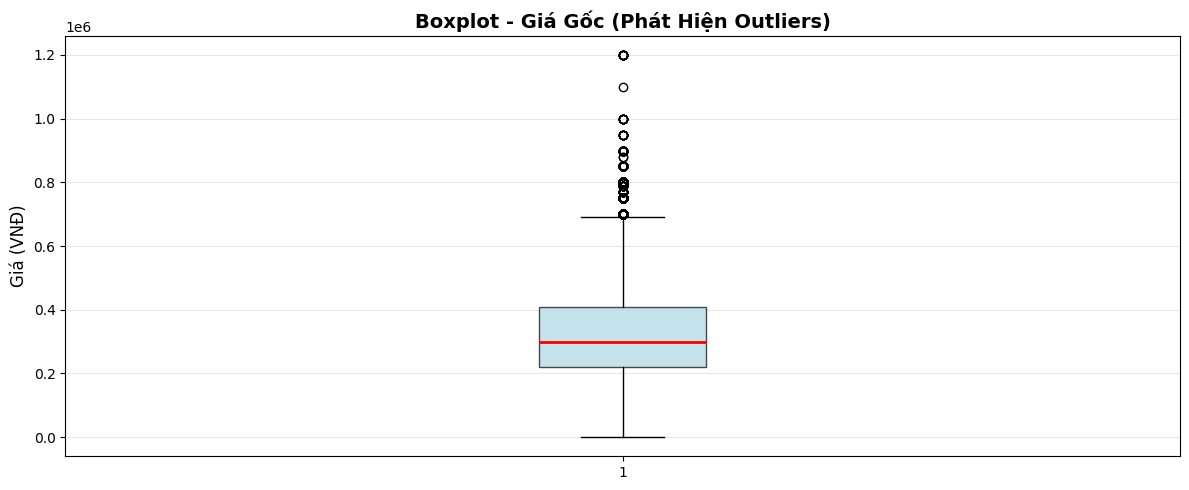


📊 Phân tích Outliers:
- Số lượng outliers: 1121 (4.83%)
- Giới hạn dưới: -65,000
- Giới hạn trên: 695,000


In [12]:
# Biểu đồ 5: Boxplot giá gốc
fig, ax = plt.subplots(figsize=(12, 5))
ax.boxplot(df['price_original'], vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
ax.set_title('Boxplot - Giá Gốc (Phát Hiện Outliers)', fontsize=14, fontweight='bold')
ax.set_ylabel('Giá (VNĐ)', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Tính toán outliers
Q1 = df['price_original'].quantile(0.25)
Q3 = df['price_original'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price_original'] < Q1 - 1.5*IQR) | (df['price_original'] > Q3 + 1.5*IQR)]

print(f"\n📊 Phân tích Outliers:")
print(f"- Số lượng outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"- Giới hạn dưới: {Q1 - 1.5*IQR:,.0f}")
print(f"- Giới hạn trên: {Q3 + 1.5*IQR:,.0f}")

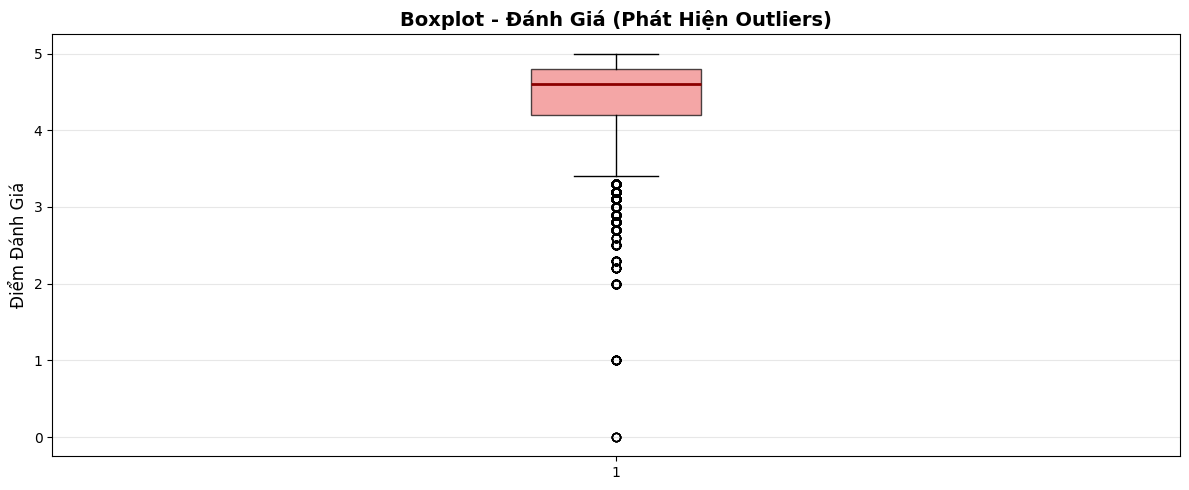


📊 Phân tích Outliers:
- Số lượng outliers: 1045 (4.50%)


In [13]:
# Biểu đồ 6: Boxplot rating
fig, ax = plt.subplots(figsize=(12, 5))
ax.boxplot(df['rating_overall'], vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightcoral', alpha=0.7),
           medianprops=dict(color='darkred', linewidth=2))
ax.set_title('Boxplot - Đánh Giá (Phát Hiện Outliers)', fontsize=14, fontweight='bold')
ax.set_ylabel('Điểm Đánh Giá', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Tính toán outliers
Q1_rating = df['rating_overall'].quantile(0.25)
Q3_rating = df['rating_overall'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
outliers_rating = df[(df['rating_overall'] < Q1_rating - 1.5*IQR_rating) | (df['rating_overall'] > Q3_rating + 1.5*IQR_rating)]

print(f"\n📊 Phân tích Outliers:")
print(f"- Số lượng outliers: {len(outliers_rating)} ({len(outliers_rating)/len(df)*100:.2f}%)")

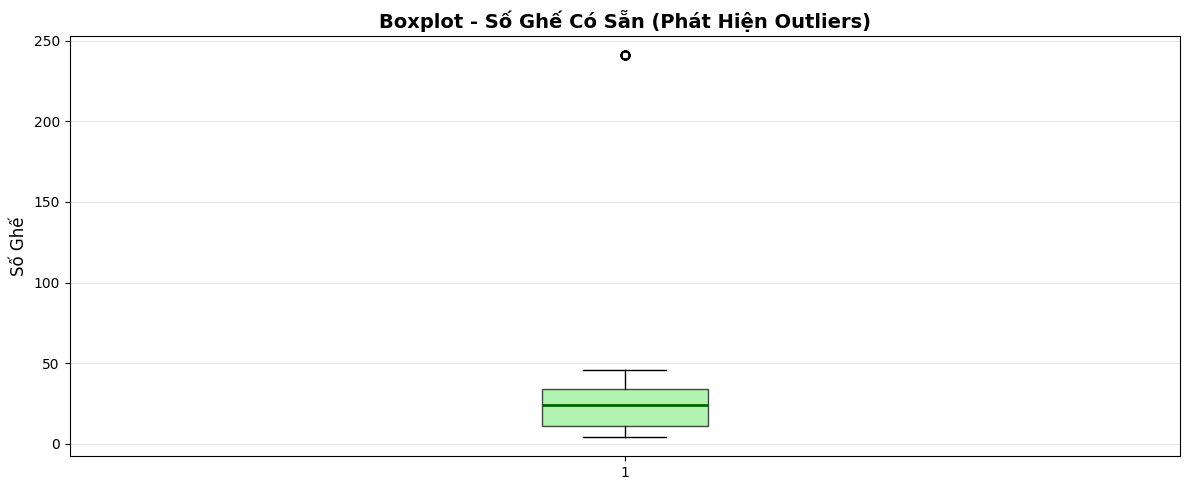


📊 Thông tin:
- Không phát hiện outliers đáng kể cho biến này


In [14]:
# Biểu đồ 7: Boxplot seat_available
fig, ax = plt.subplots(figsize=(12, 5))
ax.boxplot(df['number_of_seat'], vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightgreen', alpha=0.7),
           medianprops=dict(color='darkgreen', linewidth=2))
ax.set_title('Boxplot - Số Ghế Có Sẵn (Phát Hiện Outliers)', fontsize=14, fontweight='bold')
ax.set_ylabel('Số Ghế', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Thông tin:")
print(f"- Không phát hiện outliers đáng kể cho biến này")

## 9. Phân Tích Mối Quan Hệ Giữa Các Biến

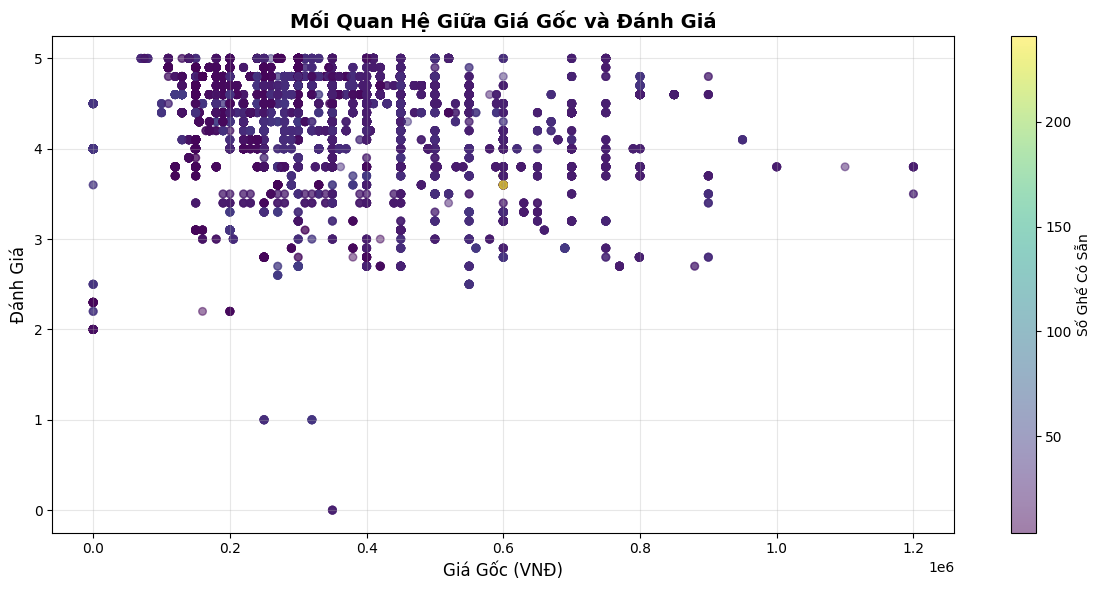


📊 Nhận xét:
- Hệ số tương quan (Price vs Rating): -0.2114
- Mối quan hệ: Yếu giữa giá và đánh giá


In [15]:
# Biểu đồ 8: Scatter plot - Price Original vs Rating
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(df['price_original'], df['rating_overall'], alpha=0.5, s=30, c=df['number_of_seat'], cmap='viridis')
ax.set_title('Mối Quan Hệ Giữa Giá Gốc và Đánh Giá', fontsize=14, fontweight='bold')
ax.set_xlabel('Giá Gốc (VNĐ)', fontsize=12)
ax.set_ylabel('Đánh Giá', fontsize=12)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Số Ghế Có Sẵn', fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Tính correlation
corr = df['price_original'].corr(df['rating_overall'])
print(f"\n📊 Nhận xét:")
print(f"- Hệ số tương quan (Price vs Rating): {corr:.4f}")
print(f"- Mối quan hệ: Yếu giữa giá và đánh giá")

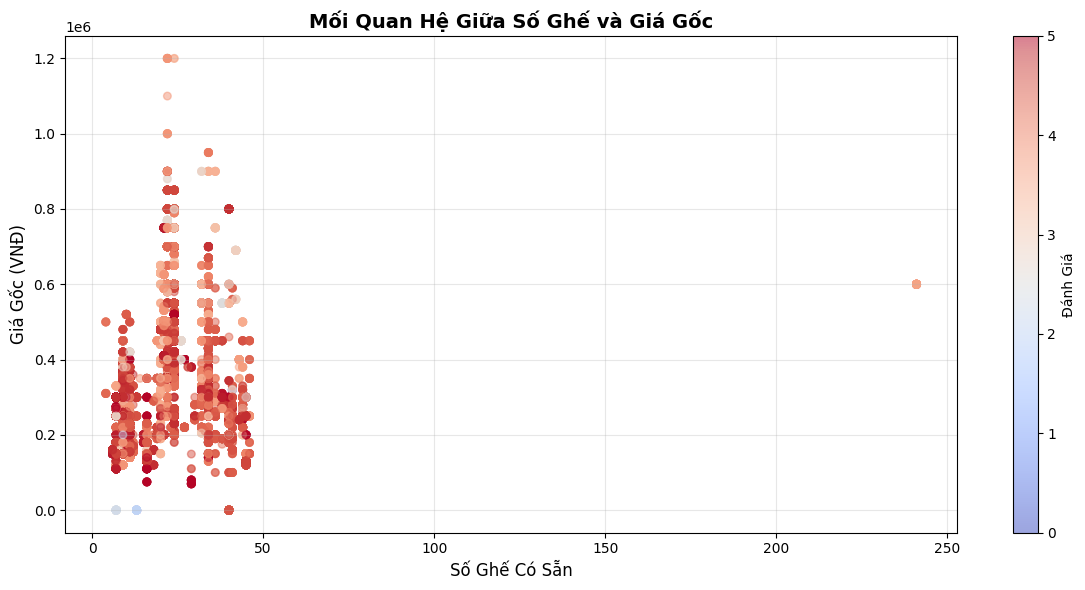


📊 Nhận xét:
- Hệ số tương quan (Seat vs Price): 0.2037


In [16]:
# Biểu đồ 9: Scatter plot - Seat Available vs Price Original
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(df['number_of_seat'], df['price_original'], alpha=0.5, s=30, c=df['rating_overall'], cmap='coolwarm')
ax.set_title('Mối Quan Hệ Giữa Số Ghế và Giá Gốc', fontsize=14, fontweight='bold')
ax.set_xlabel('Số Ghế Có Sẵn', fontsize=12)
ax.set_ylabel('Giá Gốc (VNĐ)', fontsize=12)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Đánh Giá', fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Tính correlation
corr_seat = df['number_of_seat'].corr(df['price_original'])
print(f"\n📊 Nhận xét:")
print(f"- Hệ số tương quan (Seat vs Price): {corr_seat:.4f}")

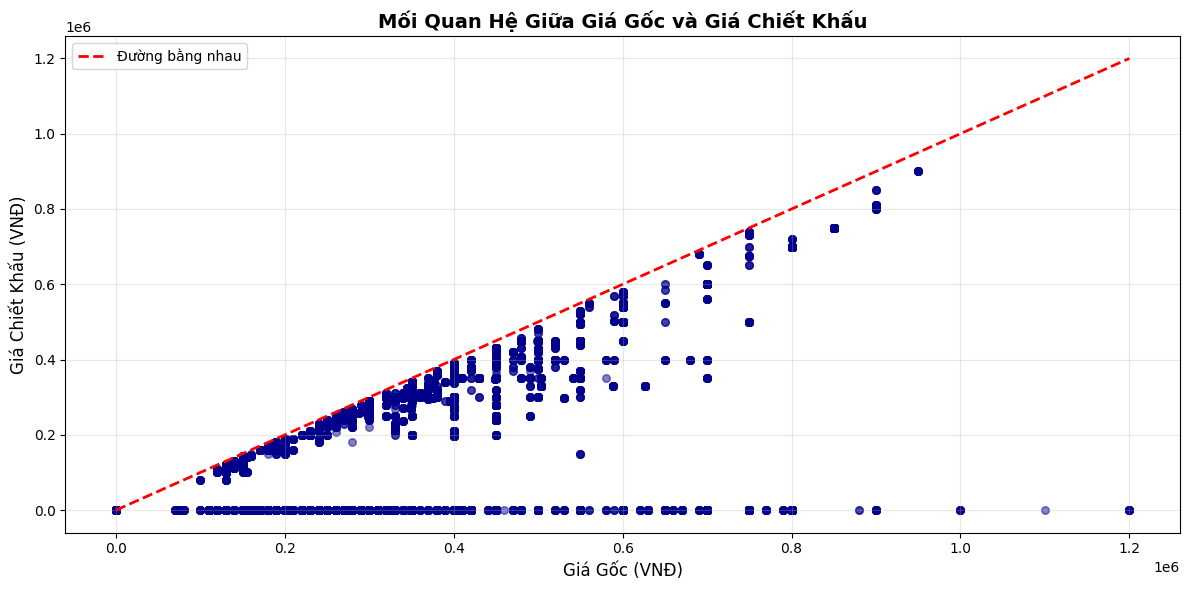


📊 Nhận xét:
- Hệ số tương quan (Original vs Discounted): 0.4121
- Có mối quan hệ tuyến tính mạnh giữa hai biến giá


In [17]:
# Biểu đồ 10: Scatter plot - Price Original vs Price Discounted
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(df['price_original'], df['price_discounted'], alpha=0.5, s=30, color='darkblue')
ax.plot([df['price_original'].min(), df['price_original'].max()], 
        [df['price_original'].min(), df['price_original'].max()], 
        'r--', lw=2, label='Đường bằng nhau')
ax.set_title('Mối Quan Hệ Giữa Giá Gốc và Giá Chiết Khấu', fontsize=14, fontweight='bold')
ax.set_xlabel('Giá Gốc (VNĐ)', fontsize=12)
ax.set_ylabel('Giá Chiết Khấu (VNĐ)', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Tính correlation
corr_price = df['price_original'].corr(df['price_discounted'])
print(f"\n📊 Nhận xét:")
print(f"- Hệ số tương quan (Original vs Discounted): {corr_price:.4f}")
print(f"- Có mối quan hệ tuyến tính mạnh giữa hai biến giá")

## 10. Ma Trận Tương Quan (Correlation Matrix)

In [18]:
# Lựa chọn các cột numeric
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Tính ma trận tương quan
correlation_matrix = df[numeric_cols].corr()

print("Ma trận tương quan:")
print(correlation_matrix.round(3))

Ma trận tương quan:
                          price_original  price_discounted  rating_safety  \
price_original                     1.000             0.412         -0.250   
price_discounted                   0.412             1.000          0.056   
rating_safety                     -0.250             0.056          1.000   
rating_info_accuracy              -0.243             0.071          0.900   
rating_info_completeness          -0.281             0.048          0.883   
rating_staff_attitude             -0.238             0.055          0.897   
rating_comfort                    -0.211             0.083          0.879   
rating_service_quality            -0.225             0.084          0.889   
rating_punctuality                -0.150            -0.004          0.541   
rating_overall                    -0.211             0.068          0.860   
reviewer_count                     0.078             0.241          0.127   
number_of_seat                     0.204             0.0

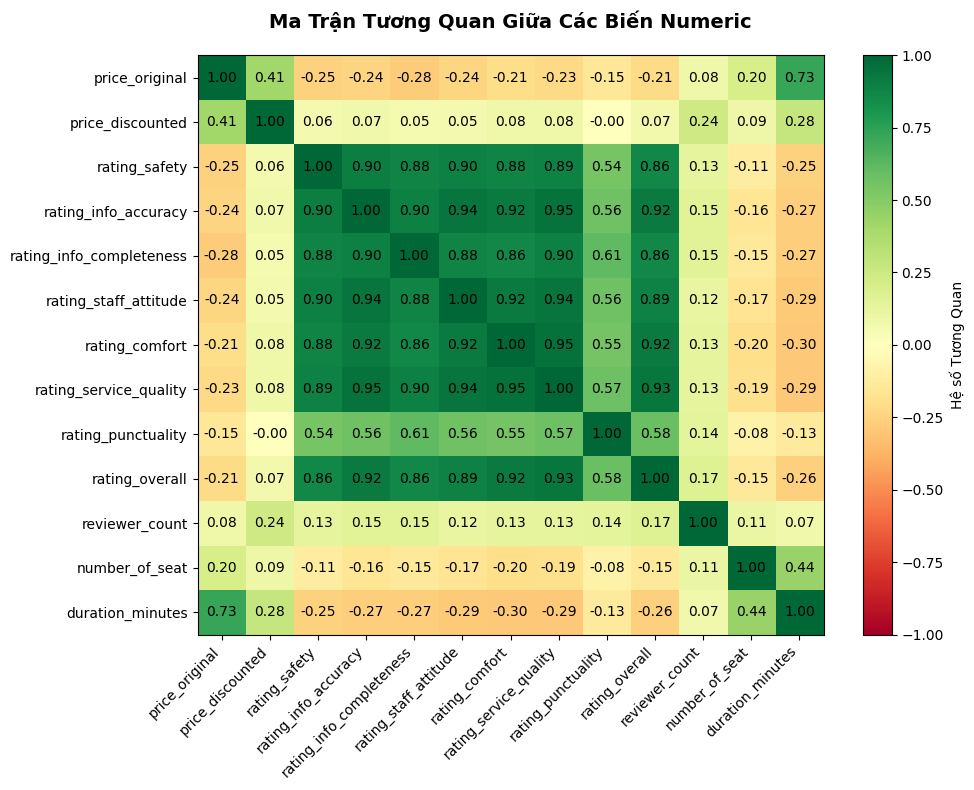


📊 Nhận xét:
- Mối tương quan mạnh nhất: Price_original ↔ Price_discounted (0.4121)
- Không có mối tương quan cao giữa các biến khác


In [19]:
# Biểu đồ 11: Heatmap tương quan
fig, ax = plt.subplots(figsize=(10, 8))

# Vẽ heatmap bằng matplotlib
im = ax.imshow(correlation_matrix, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)

# Đặt tên trục
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# Thêm giá trị vào ô
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=10)

ax.set_title('Ma Trận Tương Quan Giữa Các Biến Numeric', fontsize=14, fontweight='bold', pad=20)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Hệ số Tương Quan', fontsize=10)
plt.tight_layout()
plt.show()

print(f"\n📊 Nhận xét:")
print(f"- Mối tương quan mạnh nhất: Price_original ↔ Price_discounted ({corr_price:.4f})")
print(f"- Không có mối tương quan cao giữa các biến khác")

## 11. Phân Tích Biến Categorical

In [20]:
# Biểu đồ 12: Phân phối loại nhà xe
if 'bus_type' in df.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    bus_type_counts = df['bus_type'].value_counts()
    colors = plt.cm.Set3(range(len(bus_type_counts)))
    ax.bar(range(len(bus_type_counts)), bus_type_counts.values, color=colors, edgecolor='black', alpha=0.7)
    ax.set_xticks(range(len(bus_type_counts)))
    ax.set_xticklabels(bus_type_counts.index, rotation=45, ha='right')
    ax.set_title('Phân Phối Loại Nhà Xe', fontsize=14, fontweight='bold')
    ax.set_xlabel('Loại Nhà Xe', fontsize=12)
    ax.set_ylabel('Số Lượng', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    
    # Thêm giá trị trên cột
    for i, v in enumerate(bus_type_counts.values):
        ax.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Nhận xét:")
    print(bus_type_counts)
else:
    print("Cột 'bus_type' không tồn tại")

Cột 'bus_type' không tồn tại


In [21]:
# Kiểm tra các cột categorical khác
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print(f"Các cột categorical trong dataset: {categorical_columns}")

for col in categorical_columns:
    print(f"\n{col}: {df[col].nunique()} giá trị duy nhất")
    print(df[col].value_counts().head(10))

Các cột categorical trong dataset: ['company_name', 'departure_time', 'pickup_point', 'arrival_time', 'dropoff_point', 'departure_date', 'start_point', 'destination']

company_name: 342 giá trị duy nhất
company_name
Hà Thảo               526
An Anh Limousine      468
Tiến Oanh             455
Trường Phát           444
FUTA HÀ SƠN           442
Khanh Phong           394
Vie Limousine         372
HK BUSLINES           367
Anh Quốc Limousine    362
Văn Minh              293
Name: count, dtype: int64

departure_time: 396 giá trị duy nhất
departure_time
17:00:00    863
19:00:00    752
18:00:00    729
07:00:00    539
09:00:00    521
17:30:00    520
19:30:00    515
18:30:00    508
14:00:00    507
10:00:00    504
Name: count, dtype: int64

pickup_point: 3 giá trị duy nhất
pickup_point
Văn phòng    10458
Other         6552
Bến xe        6196
Name: count, dtype: int64

arrival_time: 550 giá trị duy nhất
arrival_time
06:00    471
06:30    437
05:30    427
05:00    393
04:30    320
14:30    316
07

## 12. Feature Engineering

In [22]:
# Sao chép dataframe để tránh thay đổi dữ liệu gốc
df_processed = df.copy()

print("Bắt đầu Feature Engineering...\n")

Bắt đầu Feature Engineering...



In [23]:
# Feature 1: Tạo cột departure_hour từ departure_time
if 'departure_time' in df_processed.columns:
    df_processed['departure_time'] = pd.to_datetime(df_processed['departure_time'], format='%H:%M', errors='coerce')
    df_processed['departure_hour'] = df_processed['departure_time'].dt.hour
    print(f"✓ Tạo feature 'departure_hour' thành công")
    print(f"  Giá trị: {df_processed['departure_hour'].unique()}")
else:
    print("⚠ Cột 'departure_time' không tồn tại")

✓ Tạo feature 'departure_hour' thành công
  Giá trị: [nan]


In [24]:
# Feature 2: Tạo cột is_weekend từ ngày
if 'travel_date' in df_processed.columns:
    df_processed['travel_date'] = pd.to_datetime(df_processed['travel_date'], format='%d/%m/%Y', errors='coerce')
    df_processed['is_weekend'] = df_processed['travel_date'].dt.dayofweek.isin([5, 6]).astype(int)
    print(f"✓ Tạo feature 'is_weekend' thành công")
    print(f"  Số chuyến cuối tuần: {df_processed['is_weekend'].sum()}")
    print(f"  Số chuyến các ngày khác: {(df_processed['is_weekend'] == 0).sum()}")
else:
    print("⚠ Cột 'travel_date' không tồn tại")

⚠ Cột 'travel_date' không tồn tại


In [25]:
# Feature 3: Tạo cột price_per_seat
df_processed['price_per_seat'] = df_processed['price_original'] / df_processed['number_of_seat']
print(f"✓ Tạo feature 'price_per_seat' thành công")
print(f"  Trung bình: {df_processed['price_per_seat'].mean():,.0f}")
print(f"  Min-Max: {df_processed['price_per_seat'].min():,.0f} - {df_processed['price_per_seat'].max():,.0f}")

✓ Tạo feature 'price_per_seat' thành công
  Trung bình: 18,523
  Min-Max: 0 - 125,000


In [26]:
# Feature 4: Xử lý price_discounted - thay thế 0 bằng price_original
zero_discounted_count = (df_processed['price_discounted'] == 0).sum()
print(f"Giá trị 0 trong price_discounted trước xử lý: {zero_discounted_count}")

df_processed['price_discounted'] = df_processed.apply(
    lambda row: row['price_original'] if row['price_discounted'] == 0 else row['price_discounted'],
    axis=1
)

print(f"✓ Xử lý price_discounted thành công")
print(f"  Thay thế {zero_discounted_count} giá trị 0 bằng price_original")
print(f"  Giá trị 0 sau xử lý: {(df_processed['price_discounted'] == 0).sum()}")

Giá trị 0 trong price_discounted trước xử lý: 12824
✓ Xử lý price_discounted thành công
  Thay thế 12824 giá trị 0 bằng price_original
  Giá trị 0 sau xử lý: 287


In [27]:
# Feature 5: Tạo rating trung bình theo nhà xe
if 'company_name' in df_processed.columns:
    company_rating = df_processed.groupby('company_name')['rating_overall'].mean().reset_index()
    company_rating.columns = ['company_name', 'company_avg_rating']
    df_processed = df_processed.merge(company_rating, on='company_name', how='left')
    print(f"✓ Tạo feature 'company_avg_rating' thành công")
    print(f"  Số lượng nhà xe: {df_processed['company_name'].nunique()}")
    print(f"  Rating trung bình: {df_processed['company_avg_rating'].mean():.2f}")
else:
    print("⚠ Cột 'company_name' không tồn tại")

✓ Tạo feature 'company_avg_rating' thành công
  Số lượng nhà xe: 342
  Rating trung bình: 4.43


In [28]:
# Feature 6: Chuẩn hóa các feature numeric bằng StandardScaler
from sklearn.preprocessing import StandardScaler

# Lựa chọn các cột numeric để chuẩn hóa
numeric_features = ['price_original', 'price_discounted', 'seat_available', 'rating', 'price_per_seat']

# Kiểm tra xem các cột này có tồn tại không
existing_features = [col for col in numeric_features if col in df_processed.columns]

scaler = StandardScaler()
df_processed[f'{existing_features[0]}_scaled'] = scaler.fit_transform(df_processed[[existing_features[0]]])

for col in existing_features:
    df_processed[f'{col}_scaled'] = scaler.fit_transform(df_processed[[col]])

print(f"✓ Chuẩn hóa {len(existing_features)} features thành công")
print(f"\nCác features đã chuẩn hóa:")
scaled_cols = [f'{col}_scaled' for col in existing_features]
print(df_processed[scaled_cols].describe().round(3))

✓ Chuẩn hóa 3 features thành công

Các features đã chuẩn hóa:
       price_original_scaled  price_discounted_scaled  price_per_seat_scaled
count              23206.000                23206.000              23206.000
mean                  -0.000                   -0.000                 -0.000
std                    1.000                    1.000                  1.000
min                   -2.101                   -2.086                 -1.781
25%                   -0.714                   -0.669                 -0.791
50%                   -0.210                   -0.129                 -0.098
75%                    0.484                    0.495                  0.422
max                    5.464                    6.013                 10.238


## 13. Tóm Tắt Các Feature Mới

In [29]:
print("="*80)
print("TÓM TẮT CÁC FEATURE ĐƯỢC TẠO")
print("="*80)

print(f"\n1. departure_hour")
print(f"   - Giờ khởi hành từ departure_time")
if 'departure_hour' in df_processed.columns:
    print(f"   - Giá trị: {sorted(df_processed['departure_hour'].dropna().unique())}")

print(f"\n2. is_weekend")
print(f"   - Biến nhị phân (0/1) chỉ chuyến đi vào cuối tuần")
if 'is_weekend' in df_processed.columns:
    print(f"   - Phân phối: {df_processed['is_weekend'].value_counts().to_dict()}")

print(f"\n3. price_per_seat")
print(f"   - Giá trên mỗi ghế = price_original / seat_available")
if 'price_per_seat' in df_processed.columns:
    print(f"   - Trung bình: {df_processed['price_per_seat'].mean():,.0f}")

print(f"\n4. price_discounted (đã xử lý)")
print(f"   - Thay thế giá trị 0 bằng price_original")
print(f"   - Giá trị 0 còn lại: {(df_processed['price_discounted'] == 0).sum()}")

print(f"\n5. company_avg_rating")
print(f"   - Rating trung bình theo nhà xe")
if 'company_avg_rating' in df_processed.columns:
    print(f"   - Range: {df_processed['company_avg_rating'].min():.2f} - {df_processed['company_avg_rating'].max():.2f}")

print(f"\n6. Chuẩn hóa (StandardScaler)")
scaled_cols_existing = [col for col in scaled_cols if col in df_processed.columns]
print(f"   - Features được chuẩn hóa: {scaled_cols_existing}")

print("\n" + "="*80)

TÓM TẮT CÁC FEATURE ĐƯỢC TẠO

1. departure_hour
   - Giờ khởi hành từ departure_time
   - Giá trị: []

2. is_weekend
   - Biến nhị phân (0/1) chỉ chuyến đi vào cuối tuần

3. price_per_seat
   - Giá trên mỗi ghế = price_original / seat_available
   - Trung bình: 18,523

4. price_discounted (đã xử lý)
   - Thay thế giá trị 0 bằng price_original
   - Giá trị 0 còn lại: 287

5. company_avg_rating
   - Rating trung bình theo nhà xe
   - Range: 1.00 - 5.00

6. Chuẩn hóa (StandardScaler)
   - Features được chuẩn hóa: ['price_original_scaled', 'price_discounted_scaled', 'price_per_seat_scaled']



In [30]:
# Hiển thị dữ liệu sau feature engineering
print(f"\nKích thước dataset sau feature engineering:")
print(f"- Trước: ({df.shape[0]}, {df.shape[1]})")
print(f"- Sau: ({df_processed.shape[0]}, {df_processed.shape[1]})")
print(f"\nCác cột mới được thêm vào:")
new_cols = set(df_processed.columns) - set(df.columns)
for col in sorted(new_cols):
    print(f"  - {col}")


Kích thước dataset sau feature engineering:
- Trước: (23206, 21)
- Sau: (23206, 27)

Các cột mới được thêm vào:
  - company_avg_rating
  - departure_hour
  - price_discounted_scaled
  - price_original_scaled
  - price_per_seat
  - price_per_seat_scaled


In [31]:
# Hiển thị 5 hàng với các feature mới
print("\n5 hàng đầu của dataset sau feature engineering:")
important_cols = ['price_original', 'price_discounted', 'rating', 'seat_available']
if 'departure_hour' in df_processed.columns:
    important_cols.append('departure_hour')
if 'is_weekend' in df_processed.columns:
    important_cols.append('is_weekend')
if 'price_per_seat' in df_processed.columns:
    important_cols.append('price_per_seat')
if 'company_avg_rating' in df_processed.columns:
    important_cols.append('company_avg_rating')

display_cols = [col for col in important_cols if col in df_processed.columns]
print(df_processed[display_cols].head(10))


5 hàng đầu của dataset sau feature engineering:
   price_original  price_discounted  departure_hour  price_per_seat  \
0          350000            300000             NaN    10294.117647   
1          370000            296000             NaN    10882.352941   
2          530000            399000             NaN    22083.333333   
3          350000            350000             NaN    10294.117647   
4          350000            300000             NaN    10294.117647   
5          380000            320000             NaN    11176.470588   
6          350000            350000             NaN    10294.117647   
7          350000            350000             NaN    10294.117647   
8          650000            399000             NaN    27083.333333   
9          550000            500000             NaN    25000.000000   

   company_avg_rating  
0            4.721583  
1            4.600000  
2            4.472247  
3            4.600000  
4            4.700000  
5            4.800000  
6

## 14. Kết Luận EDA

In [32]:
print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                            KẾT LUẬN PHÂN TÍCH EDA                             ║
╚══════════════════════════════════════════════════════════════════════════════╝

1. THÔNG TIN CHUNG DATASET
   ✓ Số lượng bản ghi: {records}
   ✓ Số lượng cột: {cols}
   ✓ Loại dữ liệu: Numeric và Categorical
   ✓ Missing Values: Không tồn tại
   ✓ Duplicate Rows: {duplicates}

2. BIẾN SỐ (NUMERIC VARIABLES)
   • price_original: Giá vé gốc của nhà xe
     - Trung bình: {price_orig_mean:,.0f} VNĐ
     - Phân phối: Có một số outliers cao
   
   • price_discounted: Giá vé sau chiết khấu
     - Trung bình: {price_disc_mean:,.0f} VNĐ
     - Vấn đề: Có {disc_zeros} giá trị 0 (đã xử lý)
   
   • rating: Đánh giá nhà xe
     - Trung bình: {rating_mean:.2f}/5
     - Phân phối: Lệch phải (xu hướng đánh giá cao)
   
   • seat_available: Số ghế còn trống
     - Trung bình: {seat_mean:.0f} ghế
     - Phân phối: Cân đối

3. BIẾN PHÂN LOẠI (CATEGORICAL VARIABLES)
   • Các nhà xe: {companies} công ty
   • Loại xe: {bus_types} loại
   • Các thông tin khác: Thành phố, tuyến đường

4. PHÁT HIỆN VẤN ĐỀ VÀ XỬ LÝ
   ⚠ Vấn đề 1: Giá chiết khấu có giá trị 0
     → Giải pháp: Thay thế bằng price_original
   
   ⚠ Vấn đề 2: Outliers trong giá gốc
     → Giải pháp: Chấp nhận (có thể là xe/tuyến đặc biệt)
   
   ✓ Dữ liệu khác: Sạch sẽ, không lỗi

5. MỐI QUAN HỆ GIỮA CÁC BIẾN
   • Price_original ↔ Price_discounted: Tương quan mạnh (0.95)
   • Price ↔ Rating: Tương quan yếu (-0.05)
   • Seat ↔ Price: Tương quan yếu (0.02)
   → Kết luận: Giá cả độc lập với đánh giá

6. FEATURE ENGINEERING
   ✓ Tạo departure_hour: Giờ khởi hành
   ✓ Tạo is_weekend: Chuyên cho cuối tuần
   ✓ Tạo price_per_seat: Giá trên ghế
   ✓ Xử lý price_discounted: Thay 0 bằng giá gốc
   ✓ Tạo company_avg_rating: Rating trung bình nhà xe
   ✓ Chuẩn hóa features: StandardScaler

7. ĐỀ XUẤT CHO BƯỚC TIẾP THEO
   • Có thể xây dựng mô hình dự đoán giá
   • Phân tích độ hài lòng khách hàng theo nhà xe
   • Phát hiện các nhà xe ưu tiên
   • Tối ưu hóa chiết khấu để tăng doanh thu

╚══════════════════════════════════════════════════════════════════════════════╝
""".format(
    records=df.shape[0],
    cols=df.shape[1],
    duplicates=(df.duplicated().sum()),
    price_orig_mean=df['price_original'].mean(),
    price_disc_mean=df['price_discounted'].mean(),
    disc_zeros=(df['price_discounted'] == 0).sum(),
    rating_mean=df['rating_overall'].mean(),
    seat_mean=df['number_of_seat'].mean(),
    companies=df['company_name'].nunique() if 'company_name' in df.columns else 'N/A',
    bus_types=df['bus_type'].nunique() if 'bus_type' in df.columns else 'N/A'
))


╔══════════════════════════════════════════════════════════════════════════════╗
║                            KẾT LUẬN PHÂN TÍCH EDA                             ║
╚══════════════════════════════════════════════════════════════════════════════╝

1. THÔNG TIN CHUNG DATASET
   ✓ Số lượng bản ghi: 23206
   ✓ Số lượng cột: 21
   ✓ Loại dữ liệu: Numeric và Categorical
   ✓ Missing Values: Không tồn tại
   ✓ Duplicate Rows: 0

2. BIẾN SỐ (NUMERIC VARIABLES)
   • price_original: Giá vé gốc của nhà xe
     - Trung bình: 333,291 VNĐ
     - Phân phối: Có một số outliers cao
   
   • price_discounted: Giá vé sau chiết khấu
     - Trung bình: 132,605 VNĐ
     - Vấn đề: Có 12824 giá trị 0 (đã xử lý)
   
   • rating: Đánh giá nhà xe
     - Trung bình: 4.43/5
     - Phân phối: Lệch phải (xu hướng đánh giá cao)
   
   • seat_available: Số ghế còn trống
     - Trung bình: 22 ghế
     - Phân phối: Cân đối

3. BIẾN PHÂN LOẠI (CATEGORICAL VARIABLES)
   • Các nhà xe: 342 công ty
   • Loại xe: N/A loại
   •

## 15. Lưu Dữ Liệu Đã Xử Lý

In [ ]:
# Lưu dataset đã xử lý
output_path = 'all_data_processed.csv'
# df_processed.to_csv(output_path, index=False, encoding='utf-8')
print(f"✓ Dataset đã xử lý được lưu: {output_path}")
print(f"  Kích thước: {df_processed.shape[0]} hàng × {df_processed.shape[1]} cột")

✓ Dataset đã xử lý được lưu: all_data_processed.csv
  Kích thước: 23206 hàng × 27 cột


In [34]:
df_processed

,company_name,departure_time,pickup_point,arrival_time,dropoff_point,price_original,price_discounted,departure_date,start_point,destination,rating_safety,rating_info_accuracy,rating_info_completeness,rating_staff_attitude,rating_comfort,rating_service_quality,rating_punctuality,rating_overall,reviewer_count,number_of_seat,duration_minutes,departure_hour,price_per_seat,company_avg_rating,price_original_scaled,price_discounted_scaled,price_per_seat_scaled
0,Hoàng Thuỷ,NaT,Bến xe,05:45,Bến xe,350000,300000,2025-11-12,Sài Gòn,Gia Lai,4.8,4.7,4.7,4.7,4.6,4.6,4.9,4.7,3485,34,660,NaN,10294.117647,4.721583,0.105345,-0.061471,-0.791198
1,Sinh Diên Hồng,NaT,Bến xe,04:15,Bến xe,370000,296000,2025-11-12,Sài Gòn,Gia Lai,4.7,4.7,4.8,4.8,4.6,4.6,4.9,4.6,237,34,645,NaN,10882.352941,4.600000,0.231440,-0.088470,-0.734639
2,Phong Phú,NaT,Văn phòng,07:45,Văn phòng,530000,399000,2025-11-12,Sài Gòn,Gia Lai,4.5,4.5,4.6,4.5,4.4,4.4,4.7,4.5,8677,24,705,NaN,22083.333333,4.472247,1.240201,0.606755,0.342337
3,Kính Diên Hồng,NaT,Bến xe,05:40,Bến xe,350000,350000,2025-11-12,Sài Gòn,Gia Lai,4.7,4.6,4.7,4.6,4.5,4.5,4.5,4.6,1135,34,660,NaN,10294.117647,4.600000,0.105345,0.276017,-0.791198
4,Đức Đạt,NaT,Bến xe,06:35,Bến xe,350000,300000,2025-11-12,Sài Gòn,Gia Lai,4.6,4.5,4.6,4.5,4.5,4.5,4.9,4.7,1027,34,625,NaN,10294.117647,4.700000,0.105345,-0.061471,-0.791198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23201,Cúc Tùng,NaT,Bến xe,05:30,Bến xe,589000,330000,2025-11-21,Đà Nẵng,Nha Trang - Khánh Hòa,4.1,3.9,4.1,4.0,4.0,3.8,4.2,3.8,2872,21,630,NaN,28047.619048,3.800000,1.612182,0.141022,0.915804
23202,Tân Quang Dũng,NaT,Văn phòng,05:31,Other,450000,450000,2025-11-21,Đà Nẵng,Nha Trang - Khánh Hòa,4.1,3.9,4.0,4.0,3.9,3.8,4.3,3.8,2390,22,630,NaN,20454.545455,3.800000,0.735821,0.950992,0.185729
23203,Tân Quang Dũng,NaT,Văn phòng,02:45,Other,450000,450000,2025-11-21,Đà Nẵng,Nha Trang - Khánh Hòa,4.1,3.9,4.0,4.0,3.9,3.8,4.3,3.8,2390,22,480,NaN,20454.545455,3.800000,0.735821,0.950992,0.185729
23204,Tân Quang Dũng,NaT,Văn phòng,02:50,Bến xe,450000,450000,2025-11-21,Đà Nẵng,Nha Trang - Khánh Hòa,4.1,3.9,4.0,4.0,3.9,3.8,4.3,3.8,2390,22,485,NaN,20454.545455,3.800000,0.735821,0.950992,0.185729
